In [1]:
#!/usr/bin/env python
# -*- coding: UTF-8

## Initialize Python

In [4]:
!pip install nltk

^C


In [2]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.8MB/s ta 0:00:011


In [3]:
!pip install gensim

    100% |████████████████████████████████| 24.2MB 775kB/s eta 0:00:01
    100% |████████████████████████████████| 40kB 21.2MB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 12.6MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 32.1MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 25.7MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 2.9MB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 30.1MB/s ta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/f7/a6/ff/9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Stored in directory: /home/jovyan/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [5]:
# Import general packages
import imp, importlib # For working with modules
import nltk # for natural language processing tools

import pandas as pd # for working with dataframes
#from pandas.core.groupby.groupby import PanelGroupBy # For debugging
import numpy as np # for working with numbers
import pickle # For working with .pkl files
from tqdm import tqdm # Shows progress over iterations, including in pandas via "progress_apply"
import sys # For terminal tricks
import _pickle as cPickle # Optimized version of pickle
import gc # For managing garbage collector
import timeit # For counting time taken for a process
import datetime # For working with dates & times

import csv
import re
import string
import collections


import numpy as np
from itertools import groupby
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
import datetime
import ast
from collections import Counter 

#do in terminal python3 -m pip install --upgrade pandas
import statistics

import string
folder_prefix = '/home/jovyan/work/'

# Import packages for cleaning, tokenizing, and stemming text
import re # For parsing text
from unicodedata import normalize # for cleaning text by converting unicode character encodings into readable format
from nltk import word_tokenize, sent_tokenize # widely used text tokenizer
from nltk.stem.porter import PorterStemmer # an approximate method of stemming words (it just cuts off the ends)
from nltk.stem.porter import PorterStemmer # approximate but effective (and common) method of normalizing words: stems words by implementing a hierarchy of linguistic rules that transform or cut off word endings
stem = PorterStemmer().stem # Makes stemming more accessible
from nltk.corpus import stopwords # for eliminating stop words
import gensim # For word embedding models
from gensim.models.phrases import Phrases # Makes word2vec more robust: Looks not just at  To look for multi-word phrases within word2vec
from gensim.test.utils import get_tmpfile 


# Import packages for multiprocessing
import os # For navigation
##numcpus = len(os.sched_getaffinity(0)) # Detect and assign number of available CPUs
#from multiprocessing import Pool # key function for multiprocessing, to increase processing speed
#pool = Pool(processes=numcpus) # Pre-load number of CPUs into pool function
import Cython # For parallelizing word2vec
#mpdo = False # Set to 'True' if using multiprocessing--faster for creating words by sentence file, but more complicated

# FOR VISUALIZATIONS
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns # To make matplotlib prettier

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# # FOR VISUALIZATIONS
# import matplotlib
# import matplotlib.pyplot as plt

# import seaborn as sns # To make matplotlib prettier
# sns.set(style='white')
# sns.despine()

# # Visualization parameters
# % pylab inline 
# % matplotlib inline
# matplotlib.style.use('fivethirtyeight')

In [7]:
# Define data and model file paths
charters_path = "../../nowdata/traincf_2015_15_250_counts.pkl" # All text data; only charter schools (regardless if open or not)
wordsent_path = "../data/wem_wordsent_data_train250_nostem.pkl"
phrasesent_path = "../data/wem_phrasesent_data_train250_nostem.pkl"
wem_path = "../data/wem_model_train250_nostem.txt"
wem_newpath = "../data/wem_model_train250_nostem_unlapped_300d.txt"

# Define file paths to existing dicts
ess_path = "../dicts/ess_dict.txt"
prog_path = "../dicts/prog_dict.txt"
rit_path = "../dicts/rit_dict.txt"

# Define file paths for new dicts
ess_valid_path = "../dicts/ess_valid.txt"
prog_valid_path = "../dicts/prog_valid.txt"
rit_valid_path = "../dicts/rit_valid.txt"
ess_polar = "../dicts/ess_polar.txt"
prog_polar = "../dicts/prog_polar.txt"
rit_polar = "../dicts/rit_polar.txt"

In [8]:
original_df = pd.read_pickle(folder_prefix + 'nowdata/charters_2015.pkl') #Yoon's doc2vecmodel uses this as well

In [9]:
original_df

,NCESSCH,URL,LAT1516,LON1516,AM,AS,BL,HI,HP,TR,...,PROG_VALID_STR,RIT_VALID_COUNT,RIT_VALID_STR,INQUIRY_RATIO,DISCIPLINE_RATIO,ESS_VALID_RATIO,PROG_VALID_RATIO,RIT_VALID_RATIO,in_acs,GEO_LEAID
0,1.001970e+10,http://www.maef.net/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.997944,51.0,-2.545622,0.007424,0.000446,0.000893,0.001005,0.002847,NaN,NaN
1,2.000010e+10,https://education.alaska.gov/DOE_Rolodex/Schoo...,60.796131,-161.765194,167.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,200001.0
2,2.001500e+10,https://www.kgbsd.org/ketchikancharter,55.347001,-131.641191,74.0,37.0,2.0,5.0,4.0,5.0,...,-3.123525,0.0,-6.000000,0.003762,0.000752,0.000000,0.000752,0.000000,False,200150.0
3,2.001500e+10,http://www.tongassschool.org/,55.347001,-131.641191,57.0,12.0,4.0,6.0,1.0,11.0,...,-3.752448,31.0,-2.960010,0.009768,0.000177,0.000212,0.000177,0.001096,False,200150.0
4,2.001800e+10,https://aquarian.asdk12.org/,61.192407,-149.916872,10.0,11.0,6.0,19.0,2.0,51.0,...,-6.000000,0.0,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,200180.0
5,2.001800e+10,https://education.alaska.gov/DOE_Rolodex/Schoo...,61.198100,-149.876000,30.0,16.0,18.0,43.0,18.0,69.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,200180.0
6,2.001800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.001800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.001800e+10,http://www.winterberrycharterschool.com/,61.194450,-149.791641,15.0,8.0,5.0,14.0,1.0,26.0,...,-3.190948,34.0,-2.659441,0.009728,0.000193,0.000322,0.000644,0.002191,False,200180.0
9,2.001800e+10,http://www.asdk12.org/aboutschools/eagleacademy/,61.319213,-149.579442,2.0,3.0,8.0,6.0,0.0,18.0,...,-6.000000,0.0,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,200180.0


In [ ]:
original_df['WEBTEXT'][0]

In [10]:
original_df['WEBTEXT'].isna().sum() 

0

In [11]:
new_ser = []
for li in original_df['WEBTEXT']:
    if li == "":
        new_ser.append([])
    else:
        new_ser.append(li)

In [12]:
original_df['WEBTEXT'] = new_ser

In [13]:
master_webpages = []
for li in original_df['WEBTEXT']:
    for quadrup in li:
        master_webpages.append(quadrup[3])

In [14]:
len(master_webpages)

375942

In [ ]:
master_webpages[16]

In [14]:
cwd = os.getcwd()
fname = get_tmpfile(cwd + "/dmm_model") #old one- "/my_doc2vec_model_march_7"
model = gensim.models.Doc2Vec.load(fname)

In [15]:
def load_list(file_path):
    """Loads list into memory. Must be assigned to object."""
    
    textlist = []
    with open(file_path) as file_handler:
        line = file_handler.readline()
        while line:
            textlist.append(line)
            line = file_handler.readline()
    return textlist

In [16]:
inquiry_fin = [elem.strip('\n') for elem in load_list(folder_prefix + 'Charter-school-identities/dicts/inquiry.txt')]
disc_fin = [elem.strip('\n') for elem in load_list(folder_prefix + 'Charter-school-identities/dicts/discipline.txt')]

In [ ]:
inquiry_fin

In [ ]:
disc_fin

In [ ]:
#model.most_similar(positive=inquiry_fin, negative=disc_fin, topn=20) # IBL - FD

In [17]:
print("inquiry based:" ) # words core to IBL
print(model.most_similar('inquiry-based'))
print("\n")
print("problem-based:" ) # words core to IBL
print(model.most_similar('problem-based'))
print("\n")
print("discovery:" )
print(model.most_similar('discovery'))
print("\n")
print("experimental:" )
print(model.most_similar('experimental')) 
print("\n")
print("constructivist:" )
print(model.most_similar('constructivist'))

inquiry based:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('hands-on', 0.45659372210502625), ('inquiry', 0.38906407356262207), ('project-based', 0.38764166831970215), ('interdisciplinary', 0.3691994547843933), ('real-world', 0.3473743796348572), ('authentic', 0.34651991724967957), ('dtstartt', 0.3444068133831024), ('tzoffsetfrom', 0.3417990505695343), ('thematic', 0.3410494923591614), ('tzoffsetto', 0.336357980966568)]


problem-based:
[('brain-based', 0.368598997592926), ('quantum', 0.3453894257545471), ('clestin', 0.33212149143218994), ('wabo', 0.32677650451660156), ('work-based', 0.3265560567378998), ('positiva', 0.3190215826034546), ('featurette', 0.31695717573165894), ('experiental', 0.3151646852493286), ('deductive', 0.3070942759513855), ('challenge-based', 0.30255380272865295)]


discovery:
[('', 0.6902549862861633), ('learning', 0.6850546598434448), ('the', 0.6828669905662537), ('school', 0.6826611757278442), ('elementary', 0.6825370788574219), ('a', 0.670194685459137), ('th', 0.6670771837234497), ('teacher', 0.6664485931396484), ('c

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [36]:
print("discipline:" ) # words core to IBL
print(model.most_similar('discipline'))
print("\n")
print("punish:" ) # words core to IBL
print(model.most_similar('punish'))
print("\n")
print("excel:" )
print(model.most_similar('excel'))
print("\n")
print("crime:" )
print(model.most_similar('crime')) 
print("\n")
print("zero-tolerance:" )
#print(model.most_similar('zero tolerance')) -> not in model unfortunately

discipline:
[('behavior', 0.6542468070983887), ('elementary', 0.6274771094322205), ('the', 0.6263068914413452), ('', 0.6260805130004883), ('a', 0.625137448310852), ('school', 0.6212289929389954), ('teachers', 0.6207785606384277), ('teacher', 0.620637834072113), ('charter', 0.6201850175857544), ('well', 0.6201724410057068)]


punish:
[('violating', 0.393979012966156), ('truthful', 0.37939947843551636), ('encountering', 0.36896032094955444), ('fault', 0.36505669355392456), ('blaming', 0.36322021484375), ('accusation', 0.3533000349998474), ('endangers', 0.3497519791126251), ('timid', 0.34414196014404297), ('demeaning', 0.34392672777175903), ('avoidance', 0.33735230565071106)]


excel:
[('learning', 0.654613733291626), ('', 0.6526083946228027), ('school', 0.6465693712234497), ('students', 0.6437277793884277), ('teacher', 0.6399973630905151), ('support', 0.6376633644104004), ('science', 0.6362743973731995), ('th', 0.6349769830703735), ('schools', 0.6293776035308838), ('program', 0.628258883

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()


In [39]:
k = model.most_similar('discipline')
for tup in k:
    print(tup[0])

behavior
elementary
the

a
school
teachers
teacher
charter
well


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(model.docvecs)

In [ ]:
model.wv.vocab #words in the model

In [ ]:
model.wv.vocab.keys()

In [ ]:
model.wv.index2word #word-tokens will be in most-frequent to least-frequent order

In [21]:
counts = Counter({word: vocab.count for (word, vocab) in model.wv.vocab.items()})

In [22]:
counts

Counter({'evening': 7309,
         'academy': 400975,
         'first': 143612,
         'tuition-free': 11016,
         'public': 317330,
         'charter': 697369,
         'school': 2869771,
         'serves': 11583,
         'high': 390839,
         'students': 852327,
         'grades': 99943,
         '': 5298760,
         'mobile': 9913,
         'baldwin': 698,
         'counties': 2468,
         'accel': 211,
         'provides': 34572,
         'challenging': 11921,
         'college-preparatory': 2154,
         'curriculum': 250230,
         'individualized': 49093,
         'instruction': 128718,
         'small': 63483,
         'class': 239138,
         'sizes': 41672,
         'engaging': 9613,
         'use': 114240,
         'technology': 115408,
         'safe': 26206,
         'supportive': 6396,
         'environment': 48563,
         'ensure': 31535,
         'graduate': 27405,
         'college': 339779,
         'career': 69602,
         'ready': 23807,
        

In [23]:
#words in the model
print("inquiry-based:" ) # words core to IBL
print(counts['inquiry-based'])
print("\n")
print("problem-based:" ) # words core to IBL
print(counts['problem-based'])
print("\n")
print("discovery:" )
print(counts['discovery'])
print("\n")
print("experimental:" )
print(counts['experimental']) 
print("\n")
print("constructivist:" )
print(counts['constructivist'])

inquiry-based:
1116


problem-based:
230


discovery:
7537


experimental:
481


constructivist:
296


In [24]:
#words in the model
print("discipline:" ) # words core to FD
print(counts['discipline'])
print("\n")
print("punish:" ) # words core to FD
print(counts['punish'])
print("\n")
print("excel:" )
print(counts['excel'])
print("\n")
print("crime:" )
print(counts['crime']) 
print("\n")
print("zero-tolerance:" )
print(counts['zero-tolerance'])

discipline:
12766


punish:
102


excel:
12194


crime:
2079


zero-tolerance:
0


In [25]:
# cleaning part
# Create list of punctuation
import string # for one method of eliminating punctuation
punctuations = list(string.punctuation) # assign list of common punctuation symbols
punctuations+=['*','•','©','–','–','``','’','“','”','...','»',"''",'..._...','×','|_','_','§','…','⎫'] # Add a few more punctuations also common in web text
punctuations.remove('-') ; punctuations.remove("'")
#punctuations
punctstr= ''.join(punctuations)
punctstr

'!"#$%&()*+,./:;<=>?@[\\]^_`{|}~*•©––``’“”...»\'\'..._...×|__§…⎫'

In [ ]:
        # Filter out emails and URLs:
        if ("@" in word or word.startswith(('http', 'https', 'www', '//', '\\', 'x_', 'x/', 'srcimage')) or word.endswith(('.com', '.net', '.gov', '.org', '.jpg', '.pdf', 'png', 'jpeg', 'php'))):
            continue

In [26]:
stop_word_list = list(set(stopwords.words('english')))

#stop_word_list consists of dates and some repetitive words
for i in range(1,13):
    stop_word_list.append(datetime.date(2008, i, 1).strftime('%B'))
for i in range(1,13):
    stop_word_list.append((datetime.date(2008, i, 1).strftime('%B')).lower())
for i in range(1, 2100):
    stop_word_list.append(str(i))
stop_word_list.append('00') 
stop_word_list.append('el')
stop_word_list.append('en')
stop_word_list.append('la')
stop_word_list.append('los')
stop_word_list.append('para')
stop_word_list.append('las')
stop_word_list.append('san')
stop_word_list.append('mr')
stop_word_list.append('mrs')
stop_word_list.append('sa')
# stop_word_list.append('angeles')
# stop_word_list.append('diego')
# stop_word_list.append('california')
# stop_word_list.append('york')
stop_word_list.append('fax')
stop_word_list.append('email')
stop_word_list.append('phone')
# stop_word_list.append('harlem')
# stop_word_list.append('bronx')
# stop_word_list.append('wi')
stop_word_list.append('am')
stop_word_list.append('pm')
stop_word_list.append('org')
stop_word_list.extend(['Menu', 'Contact Us', 'Facebook', 'Calendar', 'Lunch', 'Breakfast', 'FAQs', 'FAQ'])
# stop_word_list.append('city')
# stop_word_list.append('austin')
# stop_word_list.append('antonio')
# stop_word_list.append('texas')
#adding states abbreviations for stopwords
# states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
#           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
#           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
#           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
#           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV"]
# for state in states:
#           stop_word_list.append(state)
# for state in [state.lower() for state in states]:
#           stop_word_list.append(state)

#we have text.English stopwords and nltk's english stop words
stop_words_extra = text.ENGLISH_STOP_WORDS.union(stop_word_list)

In [30]:
unicode_list  = []
for i in range(1000,3000):
    unicode_list.append(chr(i))
    
def clean_string(messy_string, rem_words, unicode_list, givepunct): 
    s = re.sub(r"\\x.*|\\u.*|\\b.*|-|\u2605$", "", messy_string.replace(u"\xa0", u" ").replace(u"\\t", u" ").strip(" "))
    s = re.sub(r'[^\x00-\x7f]',r'', s) #got rid of hex character like \xa0\ adn a\x80
    
    s = re.sub(r'^https?:\/\/.*[\r\n]*', '', s, flags=re.MULTILINE) #gets rid of urls in forms https://
    #it's hard to get rid of urls when they aren't separated by space
    s = re.sub(r'|'.join(map(re.escape, unicode_list)), '', s) #should remove unicode characters
    li_text = []
    for word in re.split('\n|\t|\*|\r|\s', s): #split the string into a list of substrings split on the regex characters
        
        #gets rid of the rem_words, numbers, and emails
        # Filter out emails and URLs:
        if ("@" in word or word.startswith(('http', 'https', 'www', '//', '\\', 'x_', 'x/', 'srcimage')) or word.endswith(('.com', '.net', '.gov', '.org', '.jpg', '.pdf', 'png', 'jpeg', 'php'))):
            continue #skip this word, ignore it
            
        if ((word not in (rem_words)) and (not word.isdigit()) and ("@" not in word)) :
            li_text.append(re.sub(r'['+givepunct+']', r'', word))
    s = ' '.join(li_text) #join strings together
    s = ''.join(i for i in s if not i.isdigit()) #2nd check to remove numbers
    s = re.sub(' +', ' ',s) #remove duplicate whitespace
    s = s.strip() #remove whitespace at beginning and end of string
    return s

In [33]:
def clean_string_fast(messy_string, givepunct): 
#     s = re.sub(r"\\x.*|\\u.*|\\b.*|-|\u2605$", "", messy_string.replace(u"\xa0", u" ").replace(u"\\t", u" ").strip(" "))
#     s = re.sub(r'[^\x00-\x7f]',r'', s) #got rid of hex character like \xa0\ adn a\x80
    
#     s = re.sub(r'^https?:\/\/.*[\r\n]*', '', s, flags=re.MULTILINE) #gets rid of urls in forms https://
#     #it's hard to get rid of urls when they aren't separated by space
#     s = re.sub(r'|'.join(map(re.escape, unicode_list)), '', s) #should remove unicode characters
    li_text = []
    for word in re.split('\n|\t|\*|\r|\s', messy_string): #split the string into a list of substrings split on the regex characters
        
        #gets rid of the rem_words, numbers, and emails
        # Filter out emails and URLs:
        if ("@" in word or word.startswith(('http', 'https', 'www', '//', '\\', 'x_', 'x/', 'srcimage')) or word.endswith(('.com', '.net', '.gov', '.org', '.jpg', '.pdf', 'png', 'jpeg', 'php'))):
            continue #skip this word, ignore it
            
        #we don't need stop words here
        li_text.append(re.sub(r'['+givepunct+']', r'', word)) #substitue the punctuation in the word with empty string
    s = ' '.join(li_text) #join strings together
    s = ''.join(i for i in s if not i.isdigit()) #only check to remove numbers, jut doing this sohuld be enough
    s = re.sub(' +', ' ',s) #remove duplicate whitespace
    s = s.strip() #remove whitespace at beginning and end of string
    return s

In [28]:
messy_string = original_df['WEBTEXT'][0][3][3]
messy_string

'e\n*\nQuestions or Comments\n*\nThis iframe contains the logic required to handle AJAX powered Gravity Forms.\nOur Location\nGet Directions\nFor:\nDriving\nWalking\nBicycling\nshow options\nhide options\n Avoid Tolls \n Avoid Highways\r                        \nFrom:\nTo:\nFetching directions......\nReset directions\nPrint directions\nEmail Us\nCarolyn Akers\nChief Executive Officer\nMelissa Dean\nDirector, K-8 Initiative\nJanelle Finley\nBranding & Development Coordinator\nEva Holloway\nOffice Manager\nJabaria Jenkins\nCareer Academies Coordinator\nJeremiah Newell\nChief Operations Officer\nMichelle Parson\nDirector, Finance and Administration\nJohn Parker\nFinance Coordinator\nJanice Rivers\nExecutive Assistant to the CEO\nChandra Scott\nDirector, Strategic Initiatives\nLee Williams\nInternship Coordinator\nHilder P. Wilson\nDirector, High School Initiatives\nEmployment Opportunities\nCurrently, there\xa0are no openings at MAEF. Thanks for your interest.\n\xa0It is the policy of the

In [34]:
clean_string_fast(messy_string, punctstr)

'e Questions or Comments This iframe contains the logic required to handle AJAX powered Gravity Forms Our Location Get Directions For Driving Walking Bicycling show options hide options Avoid Tolls Avoid Highways From To Fetching directions Reset directions Print directions Email Us Carolyn Akers Chief Executive Officer Melissa Dean Director K- Initiative Janelle Finley Branding Development Coordinator Eva Holloway Office Manager Jabaria Jenkins Career Academies Coordinator Jeremiah Newell Chief Operations Officer Michelle Parson Director Finance and Administration John Parker Finance Coordinator Janice Rivers Executive Assistant to the CEO Chandra Scott Director Strategic Initiatives Lee Williams Internship Coordinator Hilder P Wilson Director High School Initiatives Employment Opportunities Currently there are no openings at MAEF Thanks for your interest It is the policy of the Mobile Area Education Foundation not to discriminate on the basis of race color sex national origin disabil

In [ ]:
# schools that have nonm

In [42]:
core_term_list = ["inquiry-based", 'problem-based', 'discovery', 'experimental', 'constructivist', "discipline", 'punish', 'excel', 'crime', 'zero-tolerance']
most_sim_list = []
for term in core_term_list:
    if term == "zero-tolerance":
        most_sim_list.append([term, []])
        break
    most_sim_tups = model.most_similar(term)
    ten_words = []
    for tup in most_sim_tups:
        ten_words.append(tup[0])
    most_sim_list.append([term, ten_words])
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [44]:
len(most_sim_list)
most_sim_list

[['inquiry-based',
  ['hands-on',
   'inquiry',
   'project-based',
   'interdisciplinary',
   'real-world',
   'authentic',
   'dtstartt',
   'tzoffsetfrom',
   'thematic',
   'tzoffsetto']],
 ['problem-based',
  ['brain-based',
   'quantum',
   'clestin',
   'wabo',
   'work-based',
   'positiva',
   'featurette',
   'experiental',
   'deductive',
   'challenge-based']],
 ['discovery',
  ['',
   'learning',
   'the',
   'school',
   'elementary',
   'a',
   'th',
   'teacher',
   'city',
   'no']],
 ['experimental',
  ['permaculture',
   'webaloo',
   'similar',
   'd',
   'experiment',
   'aquaponics',
   'problem-based',
   'direitos',
   'experimentation',
   'mientras']],
 ['constructivist',
  ['constructivism',
   'reggio',
   'orff',
   'philosophies',
   'kagan',
   'evidenced-based',
   'philosophical',
   'alls',
   'student-centered',
   'multi-level']],
 ['discipline',
  ['behavior',
   'elementary',
   'the',
   '',
   'a',
   'school',
   'teachers',
   'teacher',
   'ch

In [51]:
stats_df = original_df[['NCESSCH', 'WEBTEXT', 'CMO_WEBTEXT']]

In [48]:
#stats_df

In [57]:
def add_stats(term_list, df):
    #return a list of the series that will then be appended to the stats_df
    row = 0
    list_series = []
    for term in term_list:
        list_series.append([term , []]) #initialize list
    for li in original_df['WEBTEXT']:
        if len(li) != 0:
            big_string = ""
            for quadrup in li:
                big_string = big_string +  " " + quadrup[3]
            cleaned_string = clean_string_fast(big_string, punctstr).lower() #don't need to clean to rigorously, cuz
                #findall works with dirty text as well
            
            index = 0
            for tup in list_series:
                count = len(re.findall(tup[0], cleaned_string))
                list_series[index][1].append(count)
                index += 1                

        else:
            index = 0
            for tup in list_series:
                list_series[index][1].append(0)
                index+=1
        
        print(row)
        row+=1
        
    return list_series
    
        
    
    
    

In [58]:
list_series = add_stats(core_term_list, stats_df)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364


6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006


8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653


10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
1024

In [ ]:
##

In [59]:
list_series

[['inquiry-based',
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   

In [70]:
max_list = []
for tup in list_series:
    print(tup[0] + " : " + str(max(tup[1])))
    max_list.append(max(tup[1]))
 

inquiry-based : 20
problem-based : 31
discovery : 668
experimental : 24
constructivist : 24
discipline : 302
punish : 34
excel : 1921
crime : 177
zero-tolerance : 5


In [62]:
for tup in list_series:
    stats_df[tup[0]] = tup[1] #assign the series

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
for group_10 in most_sim_list:
    list_series_10 = add_stats(group_10[1], stats_df)
    
    for tup in list_series_10:
        stats_df[tup[0]] = tup[1] #assign the series


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


KeyboardInterrupt: 

In [66]:
stats_df

,NCESSCH,WEBTEXT,CMO_WEBTEXT,inquiry-based,problem-based,discovery,experimental,constructivist,discipline,punish,excel,crime,zero-tolerance
0,1.001970e+10,"[(http://www.maef.net/, False, 0, Evening Acad...",,0,0,0,0,0,1,0,9,0,0
1,2.000010e+10,[],,0,0,0,0,0,0,0,0,0,0
2,2.001500e+10,"[(https://www.kgbsd.org/ketchikancharter, Fals...",,0,0,0,0,0,0,0,0,0,0
3,2.001500e+10,[(http://tongassschool.org/classrooms/3rd-and-...,,0,0,1,0,0,0,0,10,0,0
4,2.001800e+10,"[(https://www.asdk12.org/aquarian, False, 0, S...",,0,0,0,0,0,0,0,0,0,0
5,2.001800e+10,[],,0,0,0,0,0,0,0,0,0,0
6,2.001800e+10,[],,0,0,0,0,0,0,0,0,0,0
7,2.001800e+10,[],,0,0,0,0,0,0,0,0,0,0
8,2.001800e+10,"[(http://winterberrycharterschool.com/, False,...",,0,0,1,0,0,3,0,1,0,0
9,2.001800e+10,[(https://www.asdk12.org/aboutschools/eagleaca...,,0,0,0,0,0,0,0,0,0,0


In [68]:
for tup in list_series:
    li = tup[1]
    print(tup[0])
    print(" avg: " + str(statistics.mean(li)) + " , " + "median: " + str(statistics.median(li)) + " , " + "mode: " + 
          str(statistics.mode(li)) + " , " + "std dev: " + str(statistics.stdev(li)) + " , " + "min: " + str(min(li)) + " , " 
          + "max: " + str(max(li)))

inquiry-based
 avg: 0.10232558139534884 , median: 0 , mode: 0 , std dev: 0.7003146409190072 , min: 0 , max: 20
problem-based
 avg: 0.02270861833105335 , median: 0 , mode: 0 , std dev: 0.36232476724695334 , min: 0 , max: 31
discovery
 avg: 0.7674418604651163 , median: 0 , mode: 0 , std dev: 9.298884928935212 , min: 0 , max: 668
experimental
 avg: 0.04642042863657091 , median: 0 , mode: 0 , std dev: 0.45254277754426453 , min: 0 , max: 24
constructivist
 avg: 0.02863657090743274 , median: 0 , mode: 0 , std dev: 0.42656755538624413 , min: 0 , max: 24
discipline
 avg: 1.8277245782033744 , median: 0 , mode: 0 , std dev: 8.732232034120612 , min: 0 , max: 302
punish
 avg: 0.11199270405836753 , median: 0 , mode: 0 , std dev: 0.8704098846698208 , min: 0 , max: 34
excel
 avg: 5.855631554947561 , median: 0 , mode: 0 , std dev: 35.348394316185455 , min: 0 , max: 1921
crime
 avg: 0.2885544915640675 , median: 0 , mode: 0 , std dev: 3.615996393120101 , min: 0 , max: 177
zero-tolerance
 avg: 0.00383036

In [81]:
x_core_term_list = ["inquiry\nbased", 'problem\nbased', 'discovery', 'experi\nmental', 'construct\nivist', "disc\nipline", 'punish', 'excel', 'crime', 'zero\ntolerance']


<BarContainer object of 10 artists>

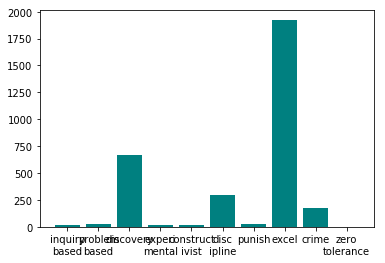

In [85]:
plt.bar(x_core_term_list, max_list, color="teal")


In [83]:

# import matplotlib.pyplot as plt

# fig = plt.figure()
# plt.bar(x_core_term_list, max_list, color="blue")
# mngr = plt.get_current_fig_manager()
# mngr.window.setGeometry(50,50,960, 640)

# plt.tight_layout()

In [119]:
inq_based_ser = []
prob_based_ser = []
discovery_ser  = []
exp_ser = []
const_ser = []
discipline_ser = []
punish_ser = []
excel_ser = []
crime_ser = []
zero_ser = []


i = 0
for li in original_df['WEBTEXT']:

    if len(li) != 0:
        
        inq_count = 0
        prob_count = 0
        discov_count = 0
        exp_count = 0
        const_count = 0
        discip_count = 0
        punish_count = 0
        excel_count = 0
        crime_count = 0
        zero_count = 0
        
        
        big_string = ""
        for quadrup in li:
            big_string = big_string +  " " + quadrup[3]
        cleaned_string = clean_string_fast(big_string, unicode_list, punctstr).lower() #don't need to clean to rigorously, cuz
        #findall works with dirty text as well
        
        
        inq_count += len(re.findall('inquiry-based', cleaned_string))
        inq_based_ser.append(inq_count)
        
        prob_count += len(re.findall('problem-based', cleaned_string))
        prob_based_ser.append(prob_count)
        
        discov_count += len(re.findall('discovery', cleaned_string))
        discovery_ser.append(discov_count)
        
        exp_count += len(re.findall('experimental', cleaned_string))
        exp_ser.append(exp_count)
        
        const_count += len(re.findall('contructivist', cleaned_string))
        const_ser.append(const_count)
        
        discip_count += len(re.findall('discipline', cleaned_string))
        discipline_ser.append(discip_count)
        
        punish_count += len(re.findall('punish', cleaned_string))
        punish_ser.append(punish_count)
        
        excel_count += len(re.findall('excel',  cleaned_string)) #want excel and not excellent
        excel_ser.append(excel_count)
        
        crime_count += len(re.findall('crime',  cleaned_string))
        crime_ser.append(crime_count)
        
        zero_count += len(re.findall('zero-tolerance', cleaned_string))
        zero_ser.append(zero_count)
       
        
    else:
        inq_based_ser.append(0)
        prob_based_ser.append(0)
        discovery_ser.append(0)
        exp_ser.append(0)
        const_ser.append(0)
        discipline_ser.append(0)
        punish_ser.append(0)
        excel_ser.append(0)
        crime_ser.append(0)
        zero_ser.append(0)
        
    print(i)
    i+=1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364


6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005


8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644


10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
1024

In [120]:
max(inq_based_ser)

20

In [83]:
s= "this/is/string.fds904qwnvdkf -- 5757**(          inquiry based      learning##5845&^(())     "
re.findall(' inquiry based ', s)

[' inquiry based ']

In [118]:
max(inq_based_ser)

0

In [114]:
# inquiry_based_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('inquiry-based', quadrup[3].lower()))
#     inquiry_based_ser.append(count)

In [100]:
max(inquiry_based_ser)

20

In [125]:
# prob_based_ser = []
# i = 0
# for li in original_df['WEBTEXT']:
#     if len(li) != 0:
#         count = 0
#         big_string = ""
#         for quadrup in li:
#             big_string = big_string +  " " + quadrup[3]
#         cleaned_string = clean_string_fast(big_string, unicode_list, punctstr) #don't need to clean, findall works with dirty text as well
#         count += len(re.findall('problem-based', cleaned_string.lower()))
#         prob_based_ser.append(count)
#     else:
#         prob_based_ser.append(0)
#     print(i)
#     i+=1



In [27]:
# discovery_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('discovery', quadrup[3].lower()))
#     discovery_ser.append(count)


In [28]:
# exp_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('experimental', quadrup[3].lower()))
#     exp_ser.append(count)


In [29]:
# const_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('contructivist', quadrup[3].lower()))
#     const_ser.append(count)


In [30]:
# discipline_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('discipline', quadrup[3].lower()))
#     discipline_ser.append(count)


In [31]:
# punish_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('punish', quadrup[3].lower()))
#     punish_ser.append(count)


In [32]:
# excel_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('excel', quadrup[3].lower())) #want excel and not excellent
#     excel_ser.append(count)


In [33]:
# crime_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('crime', quadrup[3].lower()))
#     crime_ser.append(count)


In [34]:
# zero_ser = []
# for li in original_df['WEBTEXT']:
#     count = 0
#     for quadrup in li:
#         count += len(re.findall('zero-tolerance', quadrup[3].lower()))
#     zero_ser.append(count)


In [122]:
original_df['inq-based'] = inq_based_ser
original_df['problem-based'] = prob_based_ser
original_df['discovery'] = discovery_ser
original_df['experimental'] = exp_ser
original_df['construct']  = const_ser
original_df['discipline'] = discipline_ser
original_df['punish'] = punish_ser
original_df['excel'] = excel_ser
original_df['crime'] = crime_ser
original_df['zero-tol'] = zero_ser

In [123]:
original_df

,NCESSCH,URL,LAT1516,LON1516,AM,AS,BL,HI,HP,TR,...,inq-based,problem-based,discovery,experimental,construct,discipline,punish,excel,crime,zero-tol
0,1.001970e+10,http://www.maef.net/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,9,0,0
1,2.000010e+10,https://education.alaska.gov/DOE_Rolodex/Schoo...,60.796131,-161.765194,167.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.001500e+10,https://www.kgbsd.org/ketchikancharter,55.347001,-131.641191,74.0,37.0,2.0,5.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,2.001500e+10,http://www.tongassschool.org/,55.347001,-131.641191,57.0,12.0,4.0,6.0,1.0,11.0,...,0,0,1,0,0,0,0,10,0,0
4,2.001800e+10,https://aquarian.asdk12.org/,61.192407,-149.916872,10.0,11.0,6.0,19.0,2.0,51.0,...,0,0,0,0,0,0,0,0,0,0
5,2.001800e+10,https://education.alaska.gov/DOE_Rolodex/Schoo...,61.198100,-149.876000,30.0,16.0,18.0,43.0,18.0,69.0,...,0,0,0,0,0,0,0,0,0,0
6,2.001800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,2.001800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,2.001800e+10,http://www.winterberrycharterschool.com/,61.194450,-149.791641,15.0,8.0,5.0,14.0,1.0,26.0,...,0,0,1,0,0,3,0,1,0,0
9,2.001800e+10,http://www.asdk12.org/aboutschools/eagleacademy/,61.319213,-149.579442,2.0,3.0,8.0,6.0,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
max(inq_based_ser)

16

In [124]:
li_cols= [inq_based_ser, prob_based_ser, discovery_ser, exp_ser, const_ser, discipline_ser, punish_ser, excel_ser, crime_ser, zero_ser]
st_li = ["inq-based", 'prob-based', 'discovery', 'experimental', 'constructivist', 'discipline', 'punish', 'excel', 'crime', "zero-tolerance"]
i = 0
for li in li_cols:
    print(st_li[i] + " : " + str(max(li)))
    i+=1

inq-based : 20
prob-based : 31
discovery : 668
experimental : 24
constructivist : 2
discipline : 302
punish : 34
excel : 1921
crime : 177
zero-tolerance : 5


In [61]:
for tup in list_series:
    print(tup[0] + " : " + str(max(tup[1])))

inquiry-based : 20
problem-based : 31
discovery : 668
experimental : 24
constructivist : 24
discipline : 302
punish : 34
excel : 1921
crime : 177
zero-tolerance : 5


In [132]:
#before
li_cols= [inq_based_ser, prob_based_ser, discovery_ser, exp_ser, const_ser, discipline_ser, punish_ser, excel_ser, crime_ser, zero_ser]
st_li = ["inq-based", 'prob-based', 'discovery', 'experimental', 'constructivist', 'discipline', 'punish', 'excel', 'crime', "zero-tolerance"]
i = 0
for li in li_cols:
    print(st_li[i])
    print(" avg: " + str(statistics.mean(li)) + " , " + "median: " + str(statistics.median(li)) + " , " + "mode: " + 
          str(statistics.mode(li)) + " , " + "std dev: " + str(statistics.stdev(li)) + " , " + "min: " + str(min(li)) + " , " 
          + "max: " + str(max(li)))
    i+=1

inq-based
 avg: 0.10232558139534884 , median: 0 , mode: 0 , std dev: 0.7003146409190072 , min: 0 , max: 20
prob-based
 avg: 0.02270861833105335 , median: 0 , mode: 0 , std dev: 0.36232476724695334 , min: 0 , max: 31
discovery
 avg: 0.7674418604651163 , median: 0 , mode: 0 , std dev: 9.298884928935212 , min: 0 , max: 668
experimental
 avg: 0.04642042863657091 , median: 0 , mode: 0 , std dev: 0.45254277754426453 , min: 0 , max: 24
constructivist
 avg: 0.0001823985408116735 , median: 0 , mode: 0 , std dev: 0.019099661819606834 , min: 0 , max: 2
discipline
 avg: 1.8277245782033744 , median: 0 , mode: 0 , std dev: 8.732232034120612 , min: 0 , max: 302
punish
 avg: 0.11199270405836753 , median: 0 , mode: 0 , std dev: 0.8704098846698208 , min: 0 , max: 34
excel
 avg: 5.855631554947561 , median: 0 , mode: 0 , std dev: 35.348394316185455 , min: 0 , max: 1921
crime
 avg: 0.2885544915640675 , median: 0 , mode: 0 , std dev: 3.615996393120101 , min: 0 , max: 177
zero-tolerance
 avg: 0.0038303693570

In [ ]:
#Statistics
print("Inquiry-based : ")


## Define helper functions

In [ ]:
def quickpickle_load(picklepath):
    '''Very time-efficient way to load pickle-formatted objects into Python.
    Uses C-based pickle (cPickle) and gc workarounds to facilitate speed. 
    Input: Filepath to pickled (*.pkl) object.
    Output: Python object (probably a list of sentences or something similar).'''

    with open(picklepath, 'rb') as loadfile:
        
        gc.disable() # disable garbage collector
        outputvar = cPickle.load(loadfile) # Load from picklepath into outputvar
        gc.enable() # enable garbage collector again
    
    return outputvar

In [ ]:
def write_list(file_path, textlist):
    """Writes textlist to file_path. Useful for recording output of parse_school()."""
    
    with open(file_path, 'w') as file_handler:
        
        for elem in textlist:
            file_handler.write("{}\n".format(elem))
    
    return    

In [ ]:
def load_list(file_path):
    """Loads list into memory. Must be assigned to object."""
    
    textlist = []
    with open(file_path) as file_handler:
        line = file_handler.readline()
        while line:
            textlist.append(line)
            line = file_handler.readline()
    return textlist

In [ ]:
def load_dict(custom_dict, file_path):
    """
    Loads in a dictionary from a file.
    Each word is stemmed and lower-cased in preparation for matching with word2vec.
    Adds each entry from the dict at file_path to the defined set custom_dict (the input), 
    which can also be an existing dictionary. This allows the creation of combined dictionaries!
    Multi-word dictionary elements (phrases) are transformed into a single word by
    replacing spaces with underscores, e.g. "college oriented" -> "college_oriented".
    """

    with open(file_path) as file_handler:
        line = file_handler.readline()
        while line:
            line = line.replace("\n", "") # Replace newlines at start, to avoid confusing tokenizers
            linetoks = word_tokenize(line)
            
            if len(linetoks) > 1: # For phrases (>1 word long) in dictionary
                line = [PorterStemmer().stem(word.lower()) for word in linetoks]
                line = "_".join(word for word in line)
                custom_dict.add(line.replace("_","")) # Also add element with no space between words
            else:
                line = PorterStemmer().stem(line.lower()) # For single-word dict elements, just stem it
            
            if "-" in line:
                custom_dict.add(line.replace("-","_")) # If appropriate, also add element that replaces "-" with "_"
                custom_dict.add(line.replace("-","")) # Also add element with no space between words
            
            custom_dict.add(line) # Add line after stemming dictionary entries and eliminating newlines
            line = file_handler.readline() # Look for anything else in that line, add that too
            
    return custom_dict

In [ ]:
ess_dict, prog_dict, rit_dict, ess_valid, prog_valid, rit_valid = set(), set(), set(), set(), set(), set()

ess_dict = load_dict(ess_dict, ess_path)
prog_dict = load_dict(prog_dict, prog_path)
rit_dict = load_dict(rit_dict, rit_path)

ess_valid = load_dict(ess_valid, ess_valid_path)
prog_valid = load_dict(prog_valid, prog_valid_path)
rit_valid = load_dict(rit_valid, rit_valid_path)

In [ ]:
def make_dicts(paths_list):
    '''Create ideology dictionaries: essentialism, progressivism, and ritualism.
    Input: List of paths to all files holding dictionaries.
    Output: List of dictionaries, each of which is a list of terms.'''
    
    keydicts = [] # Initialize list holding all dicts
    
    for path in paths_list:
        thisdict = set() # Initialize variable holding terms
        thisdict = load_dict(thisdict, path) # Load from file into variable
        keydicts.append(thisdict) # Add dict to list of dicts
    
    #ess_dict, prog_dict, rit_dict, all_ideol, all_dicts = set(), set(), set(), set(), set()

    #all_ideol = load_dict(all_ideol, ess_path)
    #all_ideol = load_dict(all_ideol, prog_path) # For complete ideological list, append second ideological dict
    #all_dicts = load_dict(all_ideol, rit_path) # For complete dict list, append ritual dict terms too

    #ess_dict = load_dict(ess_dict, ess_path)
    #prog_dict = load_dict(prog_dict, prog_path)
    #rit_dict = load_dict(rit_dict, rit_path)
    
    #keydicts = [ess_dict, prog_dict, rit_dict]
    
    print("Lists of key terms (dictionaries) loaded!")
    
    return(keydicts)

In [ ]:
def dict_cohere(thisdict, wem_model):
    '''Computes the average cosine similarity score of terms within one dictionary with all other terms in that same dictionary,
    effectively measuring the coherence of the dictionary.
    ...question for development: does it make sense to compare the average cosine similarity score between all terms 
    in thisdict and the average cosine similarity among the total model vocabulary? (Could that be, by definition, 0?)
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine similarity score of each word with all other words in the list of key terms.'''
    
    # Initialize average distance variables:
    word_avg_dist = 0
    word_avg_dists = 0
    dict_avg_sim = 0
    all_avg_dists = 0
    model_avg_dists = 0
    
    # Compute average cosine similarity score of each word with other dict words:
    for word in thisdict:
        word_avg_dist = (wem_model.distances(word, other_words=thisdict).sum())/len(thisdict) # Total diffs of word with all other words, take average
        word_avg_dists += word_avg_dist # Add up each average distance, incrementally
    dict_avg_sim = 1 - word_avg_dists/len(thisdict) # Find average cosine similarity score by subtracting avg. distance from 1

    # For comparison, compute average cosine similarity score of each word with ALL other words in the model vocabulary:
    #for word in thisdict:
    #    all_avg_dist = (wem_model.distances(word).sum())/len(model.vocab) # Default is to compare each word with all words
    #    all_avg_dists += all_avg_dist
    #model_avg_dist = 1 - all_avg_dists/len(model.vocab) # Find average cosine similarity score by subtracting avg. distance from 1

    #print("Average cosine similarities by word for this dictionary:       \t" + str(dict_avg_dist))
    #print("Compare to avg. cosine similarities by dict words to ALL words:\t" + str(model_avg_dist))
    
    return dict_avg_sim

In [ ]:
def dict_oppose(dict1, dict2, wem_model):
    '''Computes the average cosine similarity score of terms in dict1 with all terms in dict2,
    effectively measuring the opposition/non-coherence between the two dictionaries.
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine similarity score of each word in dict1 with all words in dict2.'''
    
    # Initialize average distance variables:
    word_avg_dist = 0
    word_avg_dists = 0
    dicts_avg_dist = 0
    
    # Compute average cosine similarity score of each term in dict1 with all terms in dict2:
    for word in dict1:
        word_avg_dist = (wem_model.distances(word, other_words=dict2).sum())/len(dict2) # Total diffs of word with all other words, take average
        word_avg_dists += word_avg_dist # Add up each average distance, incrementally
    dicts_avg_dist = word_avg_dists/len(dict1) # Find average cosine similarity score by subtracting avg. distance from 1
    
    return dicts_avg_dist

In [ ]:
def focus_dict(thisdict, coredict, maxlen, wem_model):
    '''Focus thisdict by removing least similar word vectors until reaching maxlen.
    If any words from coredict get removed, compensate for fact that they will get added back in.
    
    Input: A list of terms, core terms not to remove, desired length, and word2vec model.
    Output: The input list focused down to desired length, and still containing all the core terms.'''

    core_count = 0 # Counts number of coredict terms that were removed
    extend_count = 0 # Counts number of terms removed to offset the coming boost of core terms (that were removed and will be added back in)

    while len(thisdict) > maxlen: # Narrow thisdict down to maxlen
        badvar = model.doesnt_match(thisdict) # Find least matching term
        thisdict.remove(badvar) # Remove that least focal term, to focus dict
        if badvar in coredict: # Keep track of number of core terms removed
            core_count += 1

    while extend_count < core_count: # Remove terms until length = maxlen - number of core terms removed (to offset those core terms that will be added back in later in this script)
        badvar = model.doesnt_match(thisdict) # Find least matching term
        thisdict.remove(badvar) # Remove that least focal term, to focus dict
        extend_count += 1 # Keep track of # non-core terms added
        if badvar in coredict: # Keep track of number of core terms removed
            core_count += 1
            
    for term in coredict: # Add back in any missing core terms
        if term not in thisdict:
            thisdict.append(term)
            
    thisdict = list(set(thisdict)) # Remove any duplicates
    
    if len(thisdict) != maxlen: # Quality check
        print("WARNING: Function produced a dictionary of length " + str(len(thisdict)) + \
              ", which is not the specified maximum dict length of " + str(maxlen))
    
    return thisdict 

In [ ]:
def clean_textlist(textlist):
    """Removes extraneous spaces: at beginning and end of word2vec-format list of strings, 
    and between two parts of word at start of each line.
    
    Input: list of strings in word2vec format, e.g. ["aardvark .40 .01 .21...\n", "banana .25 .71 .06...\n", ...].
    Output: cleaned list of strings in word2vec format, which ideally should work for word2vec model generation."""
    
    unspaced_text = [textlist[0].replace("\n", "")]

    for oneline in textlist[1:]:
        first, pieces, line = "", [], []
        
        if "\\" in oneline:
            continue # Skip lines with URLs, etc.
        
        for piece in oneline.strip(" ").split(" "): # Remove spaces from beginning and end, then split by spaces
            if piece in ["", " ", "1.", "2.", "3.", "4.", "5.", "6.", "7.", "8.", "9.", "10."]:  # ["", " "] or (piece.replace(".", "").isdigit() and literal_eval(piece) >= 1):
                continue # Omit empty or erroneous elements (1.0 or greater)
            elif not piece.replace("-", "").strip("\n").replace(".", "").replace("e", "").isdigit(): # Check if digit (after removing negative signs, decimal points, scientific notation, and newlines)
                first += piece # If not a digit, it's part of the word, so concatenate it with rest of word
            else:
                pieces.append(piece.replace("\n", "")) # If a digit, add it to list of digits in vector

        line = (first + " " + " ".join([piece for piece in pieces])).strip(" ") # Reconstruct vector
        unspaced_text.append(line) # Add to new word2vec text list/ object
    
    return unspaced_text

## Refine & Validate the Dictionaries

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(wem_newpath) # Load word2vec model

In [ ]:
# dictionary of words in model (may not work for old gensim)
print(len(model.vocab))
sorted(list(model.vocab)[:200])

### Fine-tuning existing INQUIRY dicts

In [ ]:
# Define 30 core terms:
inq30 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 
         'problem-based', 'prbl', 'learn-by-doing', 
         'project-based', 'project-centered', 
         'experiential', 'experiential_approach', 'experientially',
         'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 
         'constructivist', 'constructivism', 
         'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 
         'socratic', 'socratic_method', 'socratic_dialogue',
         'child-centered', 'learner-centered', 'student-centered']

In [ ]:
# Load completed dict of 500 terms:
inquiry_fin = [elem.strip('\n') for elem in load_list('../dicts/inquiry.txt')]

sorted(inquiry_fin)

In [ ]:
# Remove any terms from core dict NOT in current model (these will have to be replaced):
for word in inq30:
    if word not in list(model.vocab):
        inq30.remove(word)
        print("NOT FOUND, REMOVING:\t" + word)
    else:
        #print("FOUND, KEEPING:\t\t" + word)
        pass
    
print("\nDONE")

In [ ]:
# Remove any terms from dict NOT in current model (these will have to be replaced):
for word in inquiry_fin:
    if word not in list(model.vocab):
        inquiry_fin.remove(word)
        print("NOT FOUND, REMOVING:\t" + word)
    else:
        #print("FOUND, KEEPING:\t\t" + word)
        pass
    
print("\nDONE")

In [ ]:
inquiry_fin = list(set(inquiry_fin)) # Remove duplicates

print("Length of original dict: ", len(inq30))
print("Coherence of original dict: ", str(dict_cohere(inq30, model)))

print("Length of extended dict: ", len(inquiry_fin))
print("Coherence of extended dict: ", str(dict_cohere(inquiry_fin, model)))

In [ ]:
# Find and display terms (not cosine sim scores) similar to thisdict:
addmore = []
addmore = [tup[0] for tup in model.most_similar(inquiry_fin, topn=200)]
addmore

In [ ]:
# Find the dict term that fits the others the least (maybe to delete it, to maximize dict coherence):
badterm = model.doesnt_match(inquiry_fin)
badterm

In [ ]:
#inq_write.remove(badterm)

print(len(inquiry_fin))
print(dict_cohere(inquiry_fin, model))

In [ ]:
inq470 = inquiry_fin

for term in inq30:
    if term in inq470:
        inq470.remove(term)
        
inq_write = sorted(inq30) + sorted(inq470)

inq_write

In [ ]:
#write_list("../dicts/inquiry.txt", inq_write)

### Looking for STEM cluster

In [ ]:
stem = ['stem', 
        'technology_engineering', 
                   'art+design', 
                   'steam', 
                   'cstem', 
                   'stemr', 
                   's.t.e.a.m.s', 
                   'steams_expo', 
                   'creators_and_innovators', 
                   'mathematical_experiments', 
                   'multiliteracy', 
                   'biology/environmental', 
                   'kits/manipulators', 
                   'steam_is_an_acronym', 
                   'ap_enviromental', 
                   'biology_earth/space']

print(dict_cohere(stem, model))
print(dict_oppose(stem, inq30, model))
print(dict_oppose(stem, disc30, model))
model.most_similar(stem, topn=50)

### Fine-tuning existing DISCIPLINE dict

In [ ]:
# Define 30 core terms:
disc30 = ['discipline', 'disciplinary', 
          'no-excuses', 'zero-tolerance', 'zero_tolerance', 'zero-tolerance_policy', 
          'expel', 'expellable', 'expulsion', 'suspension', 'suspended', 
          'misbehavior', 'disobedience', 'absenteeism', 'inappropriate', 
          'perpetrator', 'crime', 'criminal', 'illegal', 'drugs', 'drug-related', 
          'violation', 'violate', 'penalty', 'punish', 'penalize', 
          'authority', 'deterrence', 'deter', 
          'behavioral_expectations']

In [ ]:
# Load completed dict of 500 terms:
disc_fin = [elem.strip('\n') for elem in load_list('../dicts/discipline.txt')]
sorted(disc_fin)

In [ ]:
# Remove any terms from dict NOT in this model's vocab:
for word in disc_fin:
    if word not in list(model.vocab):
        disc_fin.remove(word)
        print("NOT FOUND, REMOVING:\t" + word)
    else:
        #print("FOUND, KEEPING:\t\t" + word)
        pass

print("\nDONE")

In [ ]:
disc_fin = list(set(disc_fin)) # Remove duplicates

print("Length of original dict: ", len(disc30))
print("Coherence of original dict: ", str(dict_cohere(disc30, model)))

print("Length of extended dict: ", len(disc_fin))
print("Coherence of extended dict: ", str(dict_cohere(disc_fin, model)))

In [ ]:
# Find the dict term that fits the others the least (maybe to delete it, to maximize dict coherence):
badterm = model.doesnt_match(disc_fin)
badterm

In [ ]:
#disc_write.remove(badterm)
print(len(disc_fin))
print(dict_cohere(disc_fin, model))

In [ ]:
# Find and display terms (not cosine sim scores) similar to thisdict:
addmore = []
addmore = [tup[0] for tup in model.most_similar(disc_fin, topn=200)]
addmore

In [ ]:
disc470 = disc_fin

for term in disc30:
    if term in disc470:
        disc470.remove(term)
        
disc_write = sorted(disc30) + sorted(disc470)

disc_write

In [ ]:
#write_list("../dicts/discipline.txt", disc_write)

In [ ]:
discnew = ['discipline', 'disciplinary', 
          'no-excuses', 'zero-tolerance', 'zero_tolerance', 'zero-tolerance_policy', 
          'expel', 'expellable', 'expulsion', 'suspension', 'suspended', 
          'misbehavior', 'disobedience', 'absenteeism', 'inappropriate', 
          'perpetrator', 'crime', 'criminal', 'illegal', 'drugs', 'drug-related', 
          'violation', 'violate', 'penalty', 'punish', 'penalize', 
          'authority', 'deterrence', 'deter', 
          'behavioral_expectations']

In [ ]:
discnew = ['deter',
           'zero_tolerance',
           'expel',
           'suspended',
           'expulsion',
           'no-excuses',
           'violate',
           'misbehavior',
           'zero-tolerance',
           'deterrence',
           'penalty',
           'perpetrator',
           'penalize',
           'disobedience',
           'violation',
           'punish',
           'zero-tolerance_policy',
           'expellable',
           'drug-related',
           'suspension', 
          'warranting', 
          'transgression', 
          'condones', 
          'false_accusation', 
          'aversive_techniques', 
          'disciplined_appropriately', 
          'reasonably_conclude', 
          'perpetrate', 
          'revocation_of_privileges', 
          'tobacco-related']

print(str(dict_cohere(discnew, model)))
print(len(discnew))
discnew = list(set(discnew))
model.most_similar(discnew, topn=50)

### Compare dicts in vector space

In [ ]:
# Define 30 core terms:
inq30 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 
         'problem-based', 'prbl', 'learn-by-doing', 
         'project-based', 'project-centered', 
         'experiential', 'experiential_approach', 'experientially',
         'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 
         'constructivist', 'constructivism', 
         'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 
         'socratic', 'socratic_method', 'socratic_dialogue',
         'child-centered', 'learner-centered', 'student-centered']

disc30 = ['discipline', 'disciplinary', 
          'no-excuses', 'zero-tolerance', 'zero_tolerance', 'zero-tolerance_policy', 
          'expel', 'expellable', 'expulsion', 'suspension', 'suspended', 
          'misbehavior', 'disobedience', 'absenteeism', 'inappropriate', 
          'perpetrator', 'crime', 'criminal', 'illegal', 'drugs', 'drug-related', 
          'violation', 'violate', 'penalty', 'punish', 'penalize', 
          'authority', 'deterrence', 'deter', 
          'behavioral_expectations']

inquiry_fin = [elem.strip('\n') for elem in load_list('../dicts/inquiry.txt')]
disc_fin = [elem.strip('\n') for elem in load_list('../dicts/discipline.txt')]

In [ ]:
# Use random adds to create a few dicts of different lengths from max length of 500:

print("TESTING DIFFERENT LENGTHS USING RANDOM ADDITIONS:\n")

inqlist, disclist = [], []; inqlist = inq30; disclist = disc30 # initialize placeholder for each growing dict
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq30, disc30, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq30, model)) + ", " + str(dict_cohere(disc30, model)))
print()

# 40 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq30, inquiry_fin)], size=10, replace=False))
#of the  words in inq_fin, if word not already in inq30 -> add it to the inquiry list
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc30, disc_fin)], size=10, replace=False))
#of the  words in disc_fin, if word not already in disc30 -> add it to the disc list

inq40, disc40 = [], []; inq40 = inqlist; disc40 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq40, disc40, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq40, model)) + ", " + str(dict_cohere(disc40, model)))
print()

# 50 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq40, inquiry_fin)], size=10, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc40, disc_fin)], size=10, replace=False))
inq50 = inqlist; disc50 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq50, disc50, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq50, model)) + ", " + str(dict_cohere(disc50, model)))
print()

# 75 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq50, inquiry_fin)], size=25, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc50, disc_fin)], size=25, replace=False))
inq75 = inqlist; disc75 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq75, disc75, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq75, model)) + ", " + str(dict_cohere(disc75, model)))
print()

# 100 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq75, disc_fin)], size=25, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc75, disc_fin)], size=25, replace=False))
inq100 = inqlist; disc100 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq100, disc100, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq100, model)) + ", " + str(dict_cohere(disc100, model)))
print()

# 200 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq100, disc_fin)], size=100, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc100, disc_fin)], size=100, replace=False))
inq200 = inqlist; disc200 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq200, disc200, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq200, model)) + ", " + str(dict_cohere(disc200, model)))
print()

# 300 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq200, disc_fin)], size=100, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc200, disc_fin)], size=100, replace=False))
inq300 = inqlist; disc300 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq300, disc300, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq300, model)) + ", " + str(dict_cohere(disc300, model)))
print()

# 400 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq300, disc_fin)], size=100, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc300, disc_fin)], size=100, replace=False))
inq400 = inqlist; disc400 = disclist
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))
print(str(len(inqlist)) + "-term dicts have this much opposition: ", str(dict_oppose(inq400, disc400, model)))
print(str(len(inqlist)) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inq400, model)) + ", " + str(dict_cohere(disc400, model)))
print()

print("500-term dicts have this much opposition: ", str(dict_oppose(inquiry_fin, disc_fin, model)))
print("500-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inquiry_fin, model)) + ", " + str(dict_cohere(disc_fin, model)))

In [ ]:
# Use removal of least similar word vectors to create a few dicts of different lengths from max length of 500:
#inqlist = inq30; disclist = disc30 # initialize placeholder for each growing dict

lens_list = [500, 400, 300, 200, 100, 75, 60, 50, 40, 30] # Define desired dict lengths

# Load full 500-term dicts:
inquiry_fin = [elem.strip('\n') for elem in load_list('../dicts/inquiry.txt')]
disc_fin = [elem.strip('\n') for elem in load_list('../dicts/discipline.txt')]

print('TESTING DICT LENGTHS BY REMOVING LEAST SIMILAR WORD VECTORS:\n')

for dictlen in lens_list: 
    inqdict, discdict = [], []
    
    inqdict = focus_dict(inquiry_fin, inq30, dictlen, model)
    discdict = focus_dict(disc_fin, disc30, dictlen, model)
    
    print(str(dictlen) + "-term dicts have this much opposition: ", str(dict_oppose(inqdict, discdict, model)))
    print(str(dictlen) + "-term dicts have this much coherence (IBL, FD): ", str(dict_cohere(inqdict, model)) + ", " + str(dict_cohere(discdict, model)))
    print()

## Surprising trends in analyzing how dictionary length affects inter-dictionary opposition and within-dictionary coherence:
### Greater lengths make for more within-dictionary coherence, but less across-dictionary opposition.
### Trimming word vectors randomly yields dictionaries that are less coherent and more opposing than does trimming those word vectors least similar to the others in the dictionary.
#### Caveat: The above patterns assume (perhaps consequentially, perhaps not) that as we trim dictionaries, we are keeping a small, core list of concepts (here, 30) intact within each dictionary. The size of this core may influence the above dynamics, as may the relative size of the total dictionary compared to the core list.

In [ ]:
model.most_similar(positive=inquiry_fin, negative=disc_fin, topn=20) # IBL - FD

In [ ]:
model.most_similar(negative=inquiry_fin, positive=disc_fin, topn=20) # FD - IBL

In [ ]:
# Let's look at two vectors that demonstrate the binary between these ideologies
print(model.most_similar('inquiry-based')) # words core to IBL
print()
print(model.most_similar('zero-tolerance')) # words core to FD

In [ ]:
# Define 30 core terms:
inq30 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 
         'problem-based', 'prbl', 'learn-by-doing', 
         'project-based', 'project-centered', 
         'experiential', 'experiential_approach', 'experientially',
         'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 
         'constructivist', 'constructivism', 
         'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 
         'socratic', 'socratic_method', 'socratic_dialogue',
         'child-centered', 'learner-centered', 'student-centered']

disc30 = ['discipline', 'disciplinary', 
          'no-excuses', 'zero-tolerance', 'zero_tolerance', 'zero-tolerance_policy', 
          'expel', 'expellable', 'expulsion', 'suspension', 'suspended', 
          'misbehavior', 'disobedience', 'absenteeism', 'inappropriate', 
          'perpetrator', 'crime', 'criminal', 'illegal', 'drugs', 'drug-related', 
          'violation', 'violate', 'penalty', 'punish', 'penalize', 
          'authority', 'deterrence', 'deter', 
          'behavioral_expectations']

# Load full 500-term dicts:
inquiry_fin = [elem.strip('\n') for elem in load_list('../dicts/inquiry.txt')]
disc_fin = [elem.strip('\n') for elem in load_list('../dicts/discipline.txt')]

In [ ]:
# Let's work with the binary between IBL and FD
# first let's find the 30 words closest to each philosophy using the two 30-term dictionaries defined above
inq_words = model.most_similar("inquiry-based", topn=50)
inq_words = [word for word, similarity in inq_words]
#for word in progressivism:
#    prog_words.append(word)
print(inq_words[:20])

In [ ]:
disc_words = model.most_similar("zero-tolerance", topn=50) # now let's get the 30 most similar words for our FD dictionary
disc_words = [word for word, similarity in disc_words]
#for word in essentialism:
#    ess_words.append(word)
print(disc_words[:20])

In [ ]:
# Define 30 core terms:
inq30 = ['discovery-based', 'student-driven_exploration', 'exploration_and_experimentation', 'laboratory-based', 
         'problem-based', 'prbl', 'learn-by-doing', 
         'project-based', 'project-centered', 
         'experiential', 'experiential_approach', 'experientially',
         'inquiry-based', 'inquiry-driven', 'student-centered_inquiry-based', 'active_inquiry', 
         'constructivist', 'constructivism', 
         'hands-on', 'hand-on', 'hands-on_learning', 'hands-on_and_minds-on', 'hands-on_minds-on', 'hands-on/minds-on', 
         'socratic', 'socratic_method', 'socratic_dialogue',
         'child-centered', 'learner-centered', 'student-centered']

disc30 = ['discipline', 'disciplinary', 
          'no-excuses', 'zero-tolerance', 'zero_tolerance', 'zero-tolerance_policy', 
          'expel', 'expellable', 'expulsion', 'suspension', 'suspended', 
          'misbehavior', 'disobedience', 'absenteeism', 'inappropriate', 
          'perpetrator', 'crime', 'criminal', 'illegal', 'drugs', 'drug-related', 
          'violation', 'violate', 'penalty', 'punish', 'penalize', 
          'authority', 'deterrence', 'deter', 
          'behavioral_expectations']

core_words = inq30 + disc30
inquiry_fin = [elem.strip('\n') for elem in load_list('../dicts/inquiry.txt')]
disc_fin = [elem.strip('\n') for elem in load_list('../dicts/discipline.txt')]

# Use random adds to create a few dicts of different lengths from max length of 500:

inqlist, disclist = [], []; inqlist = inq30; disclist = disc30 # initialize placeholder for each growing dict
#print("Dict lengths (IBL, FD): " + str(len(inqlist)) + ", " + str(len(disclist)))

# 40 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq30, inquiry_fin)], size=10, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc30, disc_fin)], size=10, replace=False))
inq40, disc40 = [], []; inq40 = inqlist; disc40 = disclist

In [ ]:
# 50 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq40, inquiry_fin)], size=10, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc40, disc_fin)], size=10, replace=False))
inq50 = inqlist; disc50 = disclist

In [ ]:
# 75 terms:
inqlist.extend(np.random.choice([term for term in filter(lambda x: x not in inq50, inquiry_fin)], size=25, replace=False))
disclist.extend(np.random.choice([term for term in filter(lambda x: x not in disc50, disc_fin)], size=25, replace=False))
inq75 = inqlist; disc75 = disclist

In [ ]:
# construct a combined dictionary
id_words = disclist + inqlist
print(len(id_words))
#print(len(core_words))

## Analyzing the Model: Creating a Binary

In [ ]:
# preparing for visualizing this binary with word2vec
x = [model.similarity('inquiry-based', word) for word in id_words]
y = [model.similarity('expel', word) for word in id_words]

In [ ]:
# here's a visual of the progressivism/essentialism binary: 
# top-left half is essentialism, bottom-right half is progressivism
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y, alpha=1, color='b')
for i in range(len(id_words)):
    if id_words[i] in core_words:
        ax.annotate(id_words[i], (x[i], y[i]), fontweight='bold', color="blue").set_fontsize(16)
    else:
        ax.annotate(id_words[i], (x[i], y[i])).set_fontsize(16)
ax.set_xlim(.05, .55)
ax.set_xlabel('Cosine similarity with word "inquiry-based"')
ax.set_ylim(.0, .55)
ax.set_ylabel('Cosine similarity with word "expel"')
#ax.set_title()
ax.yaxis.label.set_fontsize(24)
ax.xaxis.label.set_fontsize(24)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.plot([0, 1], [0, 1], linestyle='--');

### Binary of formal discipline (top-left) and inquiry-based learning (bottom-right) word vectors

In [ ]:
fig.savefig("../data/WEM-binary_IBL-vs-FD_100318.png")